# Proyecto Final - Machine Learning

**Presentado por:** Samantha Castro

## Librerias utilizadas.

In [53]:
# Basicas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import time

# Procesamiento y medición de los modelos
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, roc_curve, f1_score, recall_score, silhouette_score
from sklearn.calibration import calibration_curve
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Generación de modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans

## Exploración inicial

### Limpieza de datos.

**Analisis inicial**

In [2]:
#Importar base de datos
df_tir = pd.read_csv("Thyroid_Diff.csv")
df_tir.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [3]:
#Cantidad de datos
df_tir.shape

(383, 17)

387 datos registrados y 17 varibales.

In [4]:
#Tipo de datos
df_tir.dtypes

Age                      int64
Gender                  object
Smoking                 object
Hx Smoking              object
Hx Radiothreapy         object
Thyroid Function        object
Physical Examination    object
Adenopathy              object
Pathology               object
Focality                object
Risk                    object
T                       object
N                       object
M                       object
Stage                   object
Response                object
Recurred                object
dtype: object

Todas las variables son categoricas.

In [5]:
#Valores nulos
df_tir.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

No hay valores nulos.

**Balance entre clases**

In [6]:
#Equilibrio entre clases
clases = df_tir["Recurred"].value_counts()
print("Clases totales:", clases)

porcentaje = df_tir["Recurred"].value_counts(normalize = True) * 100
print("\nPorcentaje de clases:", porcentaje)

Clases totales: Recurred
No     275
Yes    108
Name: count, dtype: int64

Porcentaje de clases: Recurred
No     71.801567
Yes    28.198433
Name: proportion, dtype: float64


El 71.8% de nuestros datos es sobre personas sin probabilidad de volver a sufrir cancer, mientras que el 28.1% restante es sobre personas con esta probabilidad.

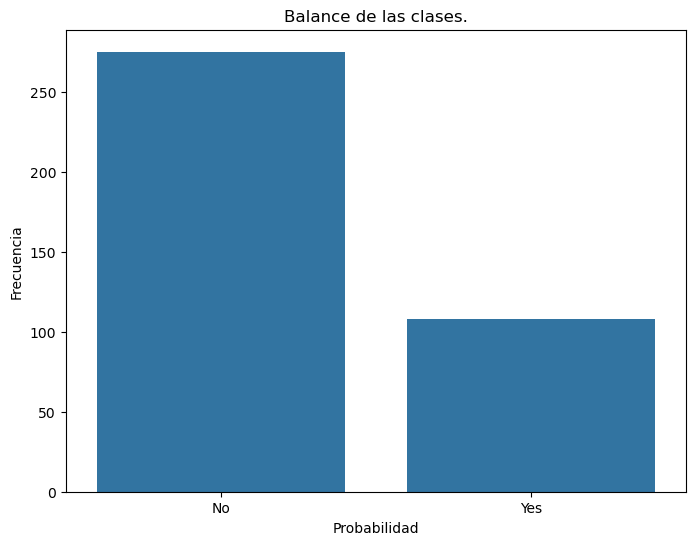

In [7]:
#Visualización
plt.figure(figsize = (8, 6))
sns.countplot(x = "Recurred", data = df_tir, order = clases.index)

plt.title("Balance de las clases.")
plt.xlabel("Probabilidad")
plt.ylabel("Frecuencia")

plt.show()

**Valores duplicados**

In [8]:
#Conteo de valores duplicados
df_tir.duplicated().sum()

np.int64(19)

In [9]:
#Visualización
duplicados = df_tir[df_tir.duplicated(keep=False)]
duplicados = duplicados.sort_values(by = "Age")
duplicados

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
168,21,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
136,21,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
161,22,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
196,22,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
121,26,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
138,26,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
183,26,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
106,26,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
119,28,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
123,28,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No


Al tratarse de datos duplicados de los mismos pacientes, decidi eliminarlos.

In [10]:
#Eliminación
df_tir_lim = df_tir.drop_duplicates(keep = "first")

In [11]:
#Comprobación
df_tir_lim.duplicated().sum()

np.int64(0)

**Tratamiento de variables categoricas**

In [12]:
#Comprobación de sintaxis
genero = df_tir_lim["Gender"].unique()
fumar = df_tir_lim["Smoking"].unique()
hx_fumar = df_tir_lim["Hx Smoking"].unique()
hx_radio = df_tir_lim["Hx Radiothreapy"].unique()
tiroides = df_tir_lim["Thyroid Function"].unique()
fisico = df_tir_lim["Physical Examination"].unique()
ade = df_tir_lim["Adenopathy"].unique()
pato =df_tir_lim["Pathology"].unique()
focal = df_tir_lim["Focality"].unique()
riesgo = df_tir_lim["Risk"].unique()
t = df_tir_lim["T"].unique()
n = df_tir_lim["N"].unique()
m = df_tir_lim["M"].unique()
estado = df_tir_lim["Stage"].unique()
respuesta = df_tir_lim["Response"].unique()
resultado = df_tir_lim["Recurred"].unique()

print("Genero:", genero)
print("Fumar:", fumar)
print("Hx fumar:", hx_fumar)
print("Hx radio:", hx_radio)
print("Tiroides:", tiroides)
print("Fisico:", fisico)
print("Ade:", ade)
print("Pato:", pato)
print("Focal:", focal)
print("Riesgo:", riesgo)
print("T:", t)
print("N:", n)
print("M:", m)
print("Estado:", estado)
print("Respuesta:", respuesta)
print("Resultado:", resultado)

Genero: ['F' 'M']
Fumar: ['No' 'Yes']
Hx fumar: ['No' 'Yes']
Hx radio: ['No' 'Yes']
Tiroides: ['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']
Fisico: ['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']
Ade: ['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']
Pato: ['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']
Focal: ['Uni-Focal' 'Multi-Focal']
Riesgo: ['Low' 'Intermediate' 'High']
T: ['T1a' 'T1b' 'T2' 'T3a' 'T3b' 'T4a' 'T4b']
N: ['N0' 'N1b' 'N1a']
M: ['M0' 'M1']
Estado: ['I' 'II' 'IVB' 'III' 'IVA']
Respuesta: ['Indeterminate' 'Excellent' 'Structural Incomplete'
 'Biochemical Incomplete']
Resultado: ['No' 'Yes']


In [13]:
#Selección de variables que se van a utilizar
df = df_tir_lim.copy()
df_clean = df.drop(["Response", "Stage", "Risk"], axis=1)
# -> Decidi eliminar estas variables ya que pueden hacer "trampa" al momento de predecir.

binarias = ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Recurred']
ordinales = ['T','N','M']
nominales = ['Thyroid Function','Physical Examination','Adenopathy','Pathology','Focality']


#Codificación binaria
binarias_t = {'Yes': 1, 'No': 0, 'M': 1, 'F': 0}

for col in binarias:
    df_clean[col] = df_clean[col].map(binarias_t)


#Codificación ordinal
ordinales_t = [['T1a', 'T1b', 'T2', 'T3a', 'T3b', 'T4a', 'T4b'], ['N0', 'N1a', 'N1b'], ['M0', 'M1']]

ord_encoder = OrdinalEncoder(categories = ordinales_t)
df_clean[ordinales] = ord_encoder.fit_transform(df_clean[ordinales])


#Codificación nominal
nominales_t = OneHotEncoder(drop = 'first', sparse_output = False)
nom_encoded = nominales_t.fit_transform(df_clean[nominales])

nom_df = pd.DataFrame(nom_encoded, columns = nominales_t.get_feature_names_out(nominales))


#Generar el dataset final (ya codificado)
df_final = pd.concat([df_clean[binarias + ordinales + ["Age"]].reset_index(drop = True), nom_df.reset_index(drop = True)], axis = 1)
df_final.head()

,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Recurred,T,N,M,Age,Thyroid Function_Clinical Hypothyroidism,...,Physical Examination_Single nodular goiter-right,Adenopathy_Extensive,Adenopathy_Left,Adenopathy_No,Adenopathy_Posterior,Adenopathy_Right,Pathology_Hurthel cell,Pathology_Micropapillary,Pathology_Papillary,Focality_Uni-Focal
0,0,0,0,0,0,0.0,0.0,0.0,27,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0,0,1,0,0,0.0,0.0,0.0,34,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0,0,0,0,0,0.0,0.0,0.0,30,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0,0,0,0,0,0.0,0.0,0.0,62,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0,0,0,0,0,0.0,0.0,0.0,62,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [14]:
#Confirmación de variables
df_final.columns

Index(['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Recurred', 'T',
       'N', 'M', 'Age', 'Thyroid Function_Clinical Hypothyroidism',
       'Thyroid Function_Euthyroid',
       'Thyroid Function_Subclinical Hyperthyroidism',
       'Thyroid Function_Subclinical Hypothyroidism',
       'Physical Examination_Multinodular goiter',
       'Physical Examination_Normal',
       'Physical Examination_Single nodular goiter-left',
       'Physical Examination_Single nodular goiter-right',
       'Adenopathy_Extensive', 'Adenopathy_Left', 'Adenopathy_No',
       'Adenopathy_Posterior', 'Adenopathy_Right', 'Pathology_Hurthel cell',
       'Pathology_Micropapillary', 'Pathology_Papillary',
       'Focality_Uni-Focal'],
      dtype='object')

### Analisis de Datos

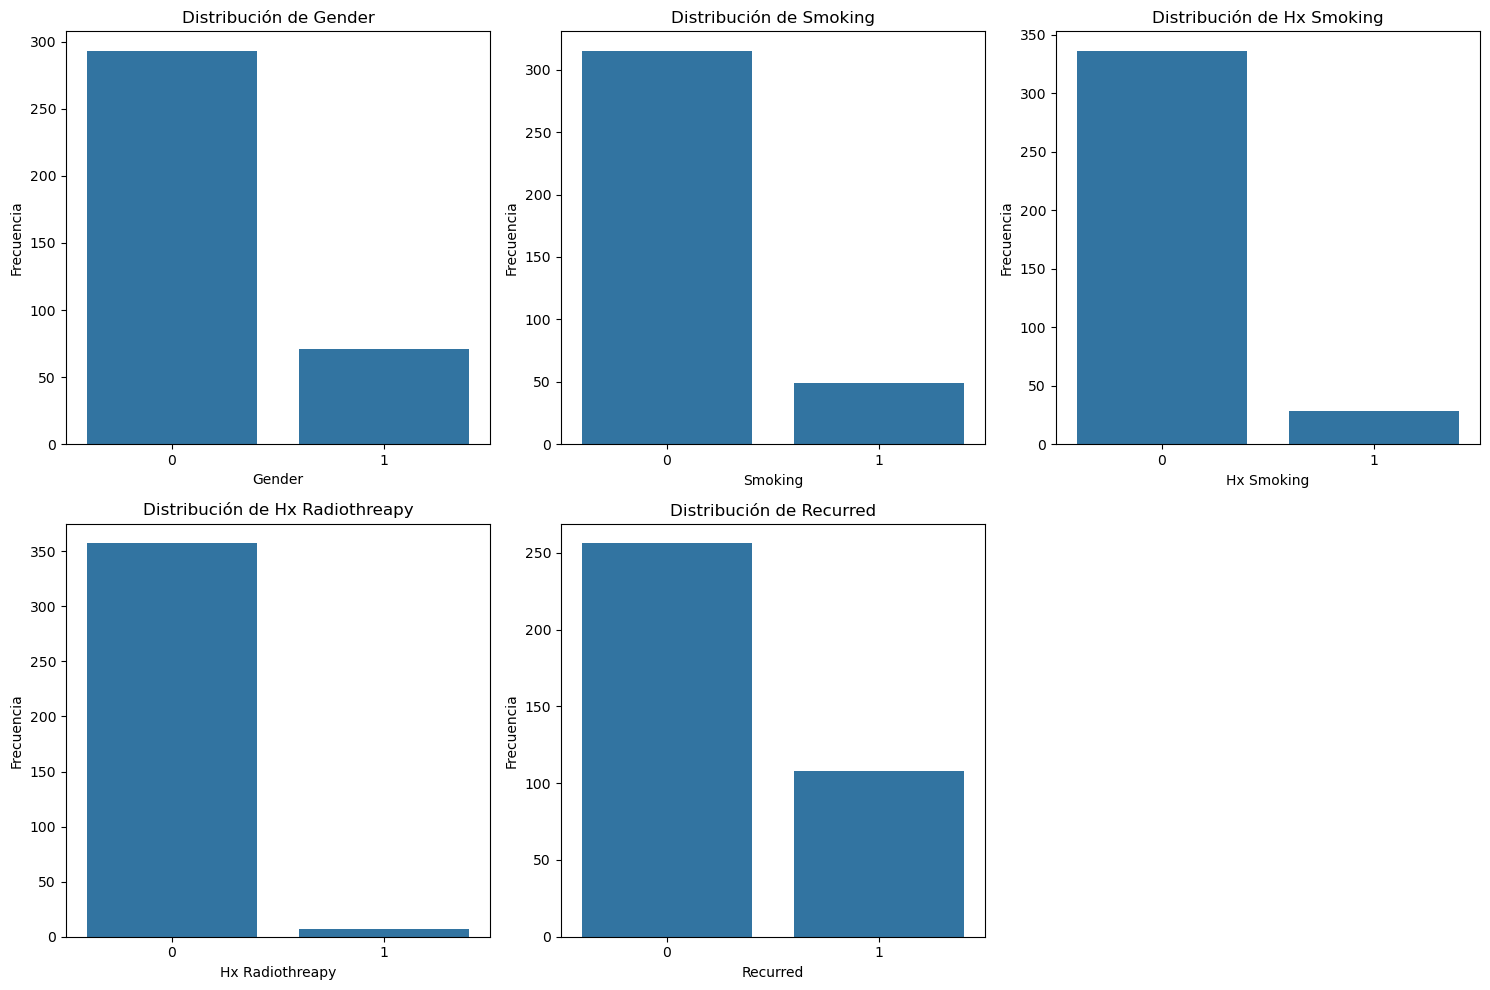

In [15]:
#Distribución de variables binarias
n = len(binarias)

fig, axes = plt.subplots(nrows = (n // 3) + 1, ncols = 3, figsize = (15, 5 * ((n // 3) + 1)))
axes = axes.flatten()

for i, col in enumerate(binarias):
    sns.countplot(data=df_final, x=col, ax=axes[i])
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frecuencia")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Con estas graficas podemos concluir que nuestro set de datos cuenta con más mujeres, personas que no fuman y no han recibido tratamiento derivado a ello, que no han tenido un tratamiento de radioterapia previo y que no cuentan con probabilidad de volver a sufrir de cancer tiroideo.

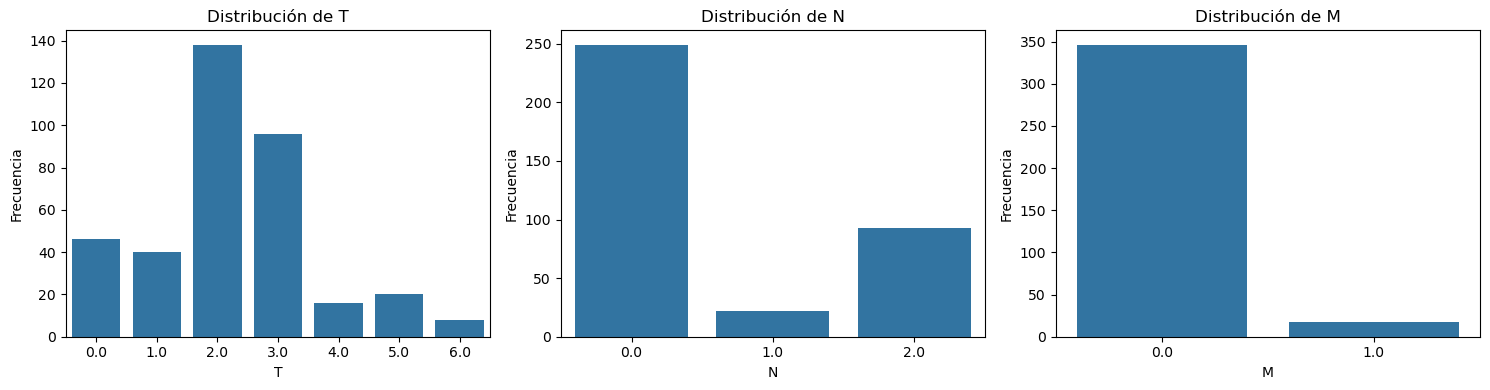

In [16]:
#Distribución de variables ordinales
n = len(ordinales)
cols = 3 
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()    

for i, col in enumerate(ordinales):
    orden = sorted(df_final[col].dropna().unique())
    sns.countplot(data=df_final, x=col, order=orden, ax=axes[i])
    
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frecuencia")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Con esta grafica concluimos que en nuestro dataset hay más personas que sufrieron tumores de grado "T2" (tumor localizado en el organo de origen) y que no resultaron en metastasis ganglionar, por ende, personas que no sufrieron de metastasis distante.

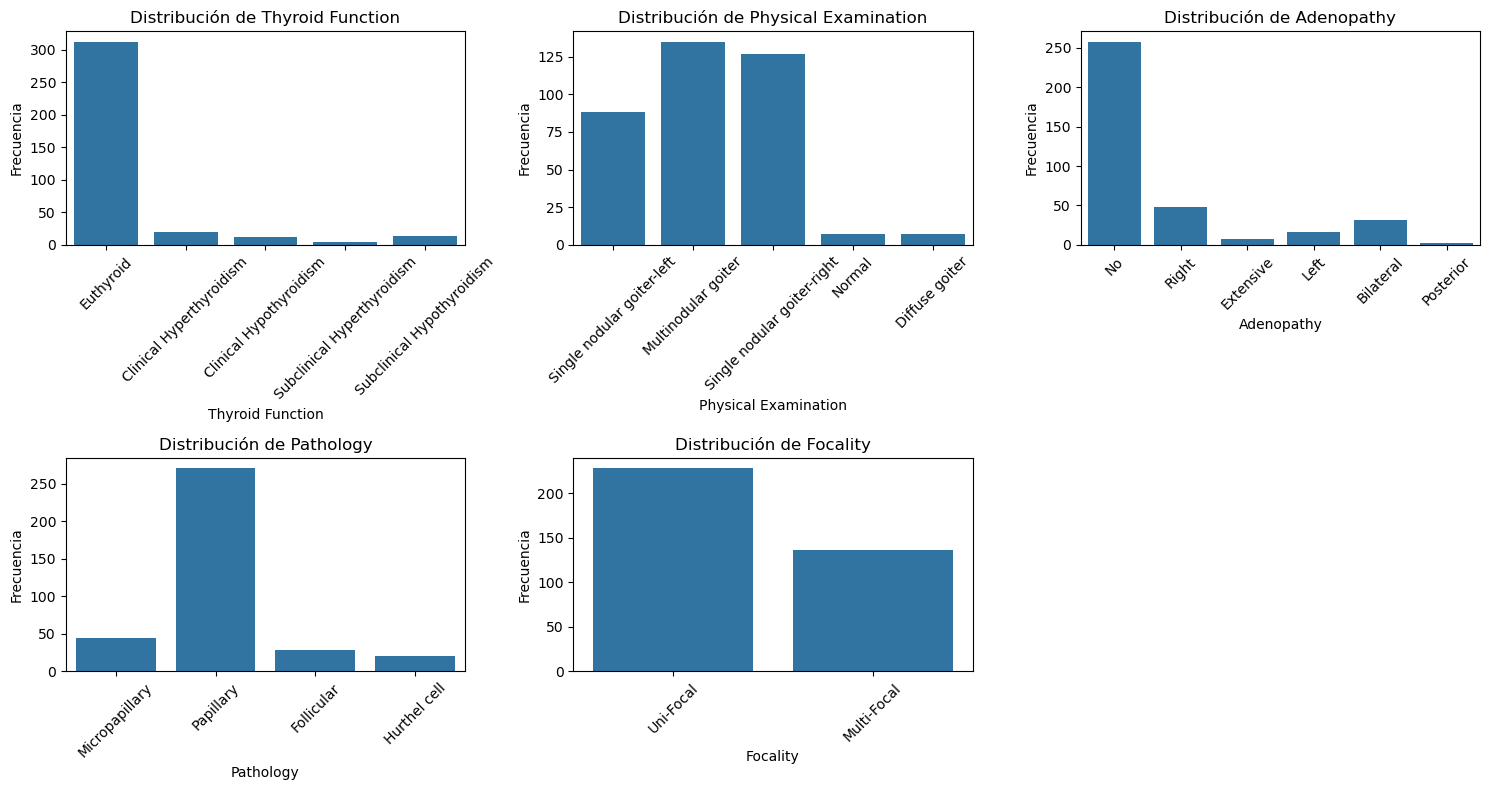

In [17]:
#Distribución de variables nominales
n = len(nominales)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()

for i, col in enumerate(nominales):
    sns.countplot(data=df, x=col, ax=axes[i])
    
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frecuencia")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Concluimos que nuestro dataset cuenta con más personas que mantienen un estado controlado de la hormona tiroidea, un agrandamiento de bocio, no cuentan con glandulas cancerosas en los ganglios linfaticos, el cancer previo se encontro en las celulas foliculares de la galndula turoidea y el tumor se genero solo en un organo (glandula tiroidea).

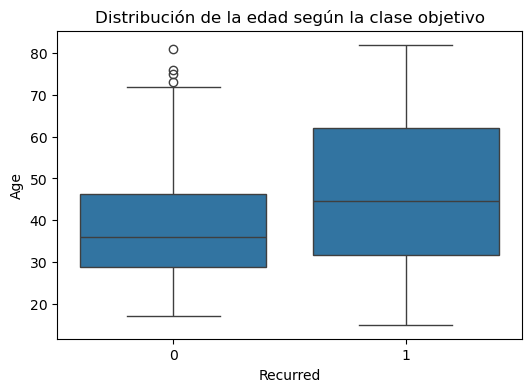

In [21]:
#Grupo de edades
objetivo = df_final["Recurred"]

plt.figure(figsize = (6, 4))
sns.boxplot(data = df_final, x = objetivo, y = 'Age')
plt.title("Distribución de la edad según la clase objetivo")

plt.show()

Nuestro dataset muestra que las personas con probabilidad de sufrir cancer nuevamente se encuentran en un rango de entre 32 y 63 años de edad, mientras que las personas que no tienen esta probabilidad se encuentran en un rango de entre 30 y 45 años de edad.

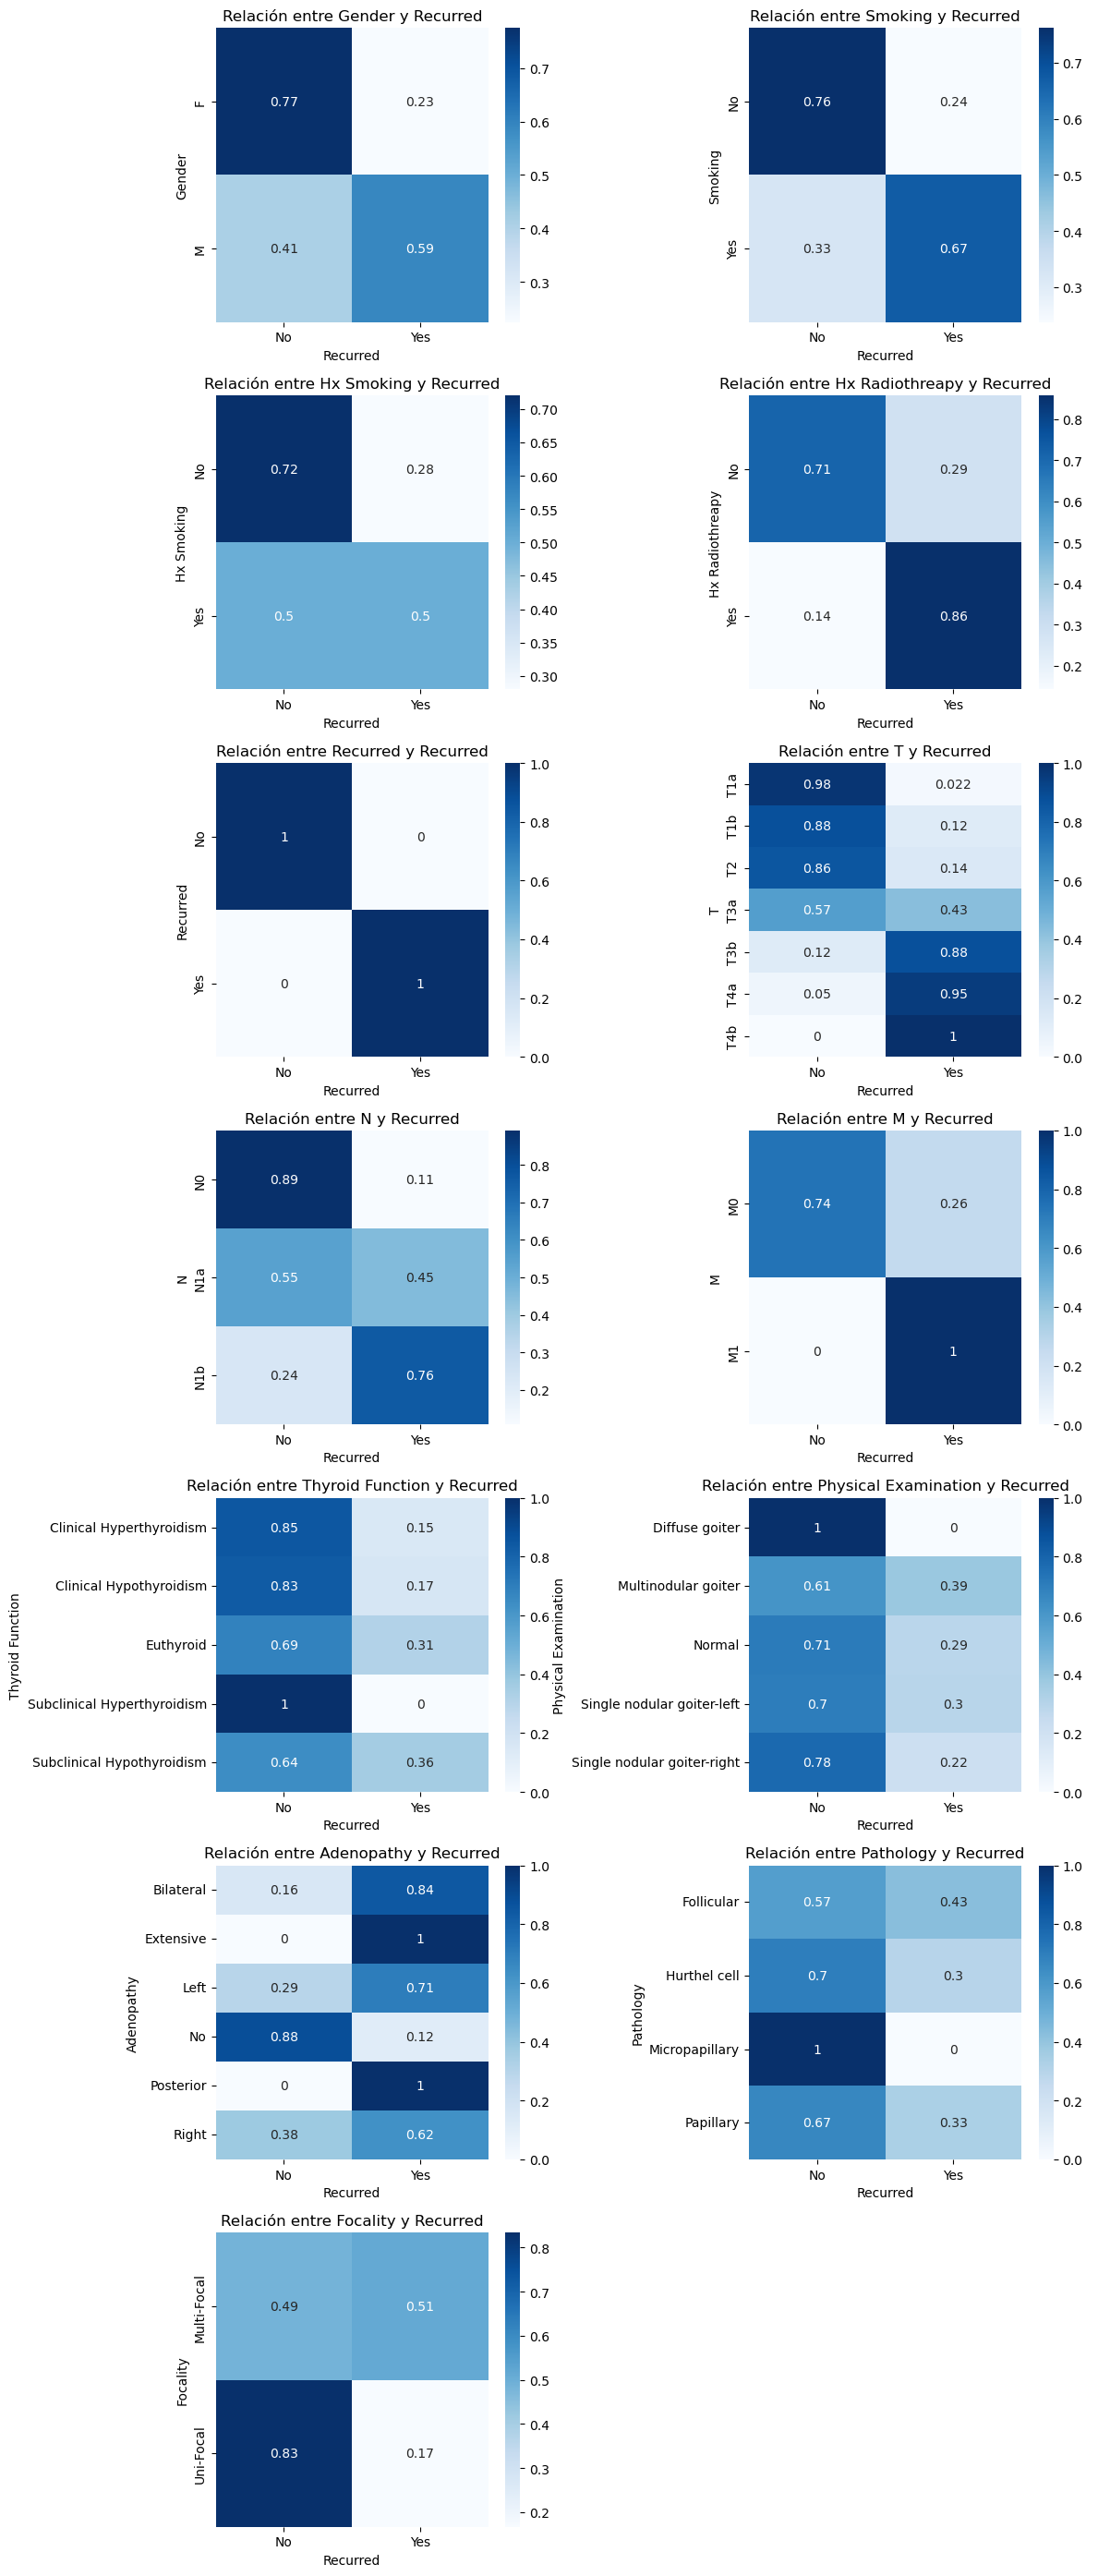

In [22]:
#Relación entre la variable objetivo y el resto de variables (grafico).
objetivo = "Recurred"
categoricas = binarias + ordinales + nominales

n = len(categoricas)
cols = 2
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))
axes = axes.flatten()

for i, col in enumerate(categoricas):
    tabla = pd.crosstab(df[col], df[objetivo], normalize='index')

    sns.heatmap(tabla, annot=True, cmap='Blues', ax = axes[i])
    axes[i].set_title(f"Relación entre {col} y {objetivo}")
    axes[i].set_ylabel(col)

for j in range(i+1, len(axes)):
    axes[j].axis("off")
   
plt.tight_layout()
plt.show()

In [23]:
#Relación entre la variable objetivo y el resto de variables (tabla).
cat_cols = df_tir_lim.select_dtypes(include='object').columns
num_cols = df_tir_lim.select_dtypes(include='number').columns

for col in cat_cols:
    display(pd.crosstab(df_tir_lim[col], df_tir_lim['Recurred'], normalize='index').style.format("{:.1%}").set_caption(f"Distribución de 'y' según {col}"))

Recurred,No,Yes
Gender,,
F,77.5%,22.5%
M,40.8%,59.2%


Recurred,No,Yes
Smoking,,
No,76.2%,23.8%
Yes,32.7%,67.3%


Recurred,No,Yes
Hx Smoking,,
No,72.0%,28.0%
Yes,50.0%,50.0%


Recurred,No,Yes
Hx Radiothreapy,,
No,71.4%,28.6%
Yes,14.3%,85.7%


Recurred,No,Yes
Thyroid Function,,
Clinical Hyperthyroidism,85.0%,15.0%
Clinical Hypothyroidism,83.3%,16.7%
Euthyroid,68.7%,31.3%
Subclinical Hyperthyroidism,100.0%,0.0%
Subclinical Hypothyroidism,64.3%,35.7%


Recurred,No,Yes
Physical Examination,,
Diffuse goiter,100.0%,0.0%
Multinodular goiter,61.5%,38.5%
Normal,71.4%,28.6%
Single nodular goiter-left,70.5%,29.5%
Single nodular goiter-right,78.0%,22.0%


Recurred,No,Yes
Adenopathy,,
Bilateral,15.6%,84.4%
Extensive,0.0%,100.0%
Left,29.4%,70.6%
No,88.4%,11.6%
Posterior,0.0%,100.0%
Right,37.5%,62.5%


Recurred,No,Yes
Pathology,,
Follicular,57.1%,42.9%
Hurthel cell,70.0%,30.0%
Micropapillary,100.0%,0.0%
Papillary,66.8%,33.2%


Recurred,No,Yes
Focality,,
Multi-Focal,48.5%,51.5%
Uni-Focal,83.3%,16.7%


Recurred,No,Yes
Risk,,
High,0.0%,100.0%
Intermediate,37.3%,62.7%
Low,94.8%,5.2%


Recurred,No,Yes
T,,
T1a,97.8%,2.2%
T1b,87.5%,12.5%
T2,85.5%,14.5%
T3a,57.3%,42.7%
T3b,12.5%,87.5%
T4a,5.0%,95.0%
T4b,0.0%,100.0%


Recurred,No,Yes
N,,
N0,89.2%,10.8%
N1a,54.5%,45.5%
N1b,23.7%,76.3%


Recurred,No,Yes
M,,
M0,74.0%,26.0%
M1,0.0%,100.0%


Recurred,No,Yes
Stage,,
I,79.3%,20.7%
II,21.9%,78.1%
III,0.0%,100.0%
IVA,0.0%,100.0%
IVB,0.0%,100.0%


Recurred,No,Yes
Response,,
Biochemical Incomplete,52.2%,47.8%
Excellent,99.5%,0.5%
Indeterminate,88.5%,11.5%
Structural Incomplete,2.2%,97.8%


Recurred,No,Yes
Recurred,,
No,100.0%,0.0%
Yes,0.0%,100.0%


En base a nuestra muestra, se puede concluir que la probabilidad de ser positivo es:
- Ser hombre.
- Fumar.
- Haber recibido tratamiento previo por alguna enfermedad derivada de fumar.
- Haber recibido radioterapia en el cancer anterior.
- Haber tenido tumores de grado avanzado.
- Sufrir de hipotiroidismo clinico.
- Agrandamiento de bocio.
- Que el cancer haya sido multifocal.

## Modelos

### Preparación previa.

In [26]:
#Separación de variables
x = df_final.drop("Recurred", axis = 1)
y = df_final["Recurred"]

In [25]:
#Separacion de datos de entrenamiento y prueba.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [27]:
#Escalamiento de datos
scaler = StandardScaler()

x_train_escalado = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_test_escalado = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)

### Regresión Logistica

In [28]:
#Creación del modelo
lr = LogisticRegression(max_iter = 1000)
lr.fit(x_train_escalado, y_train)
y_pred_lr = lr.predict(x_test_escalado)
lr

LogisticRegression(max_iter=1000)

In [29]:
#Comprobación de coeficientes
coeficientes = pd.DataFrame({'Nombre': x_train_escalado.columns, 'Coeficiente': lr.coef_[0]}).sort_values(by = "Coeficiente", ascending = False)
print(coeficientes)

                                              Nombre  Coeficiente
4                                                  T     1.236959
5                                                  N     0.918055
6                                                  M     0.852735
9                         Thyroid Function_Euthyroid     0.590712
0                                             Gender     0.555221
7                                                Age     0.524343
8           Thyroid Function_Clinical Hypothyroidism     0.391496
16                              Adenopathy_Extensive     0.272735
15  Physical Examination_Single nodular goiter-right     0.205775
19                              Adenopathy_Posterior     0.106174
2                                         Hx Smoking     0.064414
13                       Physical Examination_Normal     0.044786
17                                   Adenopathy_Left     0.040351
3                                    Hx Radiothreapy    -0.016389
11       T

In [30]:
#Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy_lr)

Accuracy: 0.8904109589041096


In [31]:
#AUC
y_pred_prob_lr = lr.predict_proba(x_test_escalado)[:,1]

auc_lr = roc_auc_score(y_test, y_pred_prob_lr)
print("AUC:", auc_lr)

AUC: 0.948306595365419


In [32]:
#Resultados del modelo
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        51
           1       0.85      0.77      0.81        22

    accuracy                           0.89        73
   macro avg       0.88      0.86      0.87        73
weighted avg       0.89      0.89      0.89        73



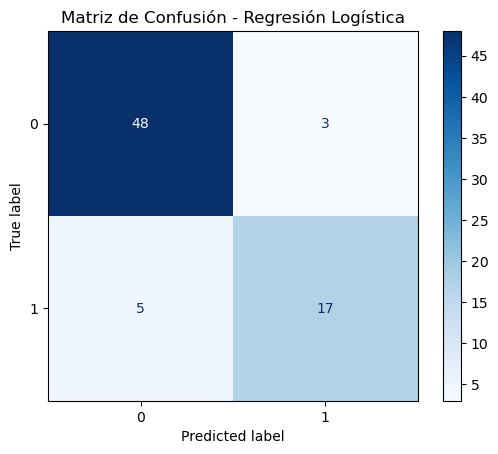

In [33]:
#Matriz de confusión
matriz = confusion_matrix(y_test, y_pred_lr)

disp = ConfusionMatrixDisplay(confusion_matrix = matriz)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

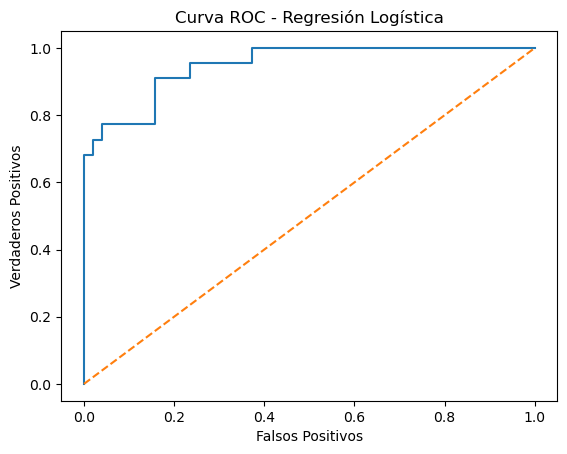

In [34]:
#Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_lr)

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.title("Curva ROC - Regresión Logística")
plt.show()

In [35]:
#Cross-validation
cv_scores = cross_val_score(lr, x_train_escalado, y_train, cv=5)
print("Cross-validation Scores:", cv_scores)
print("Promedio:", cv_scores.mean())

Cross-validation Scores: [0.89830508 0.82758621 0.81034483 0.81034483 0.84482759]
Promedio: 0.838281706604325


### Random Forest

In [36]:
#Creación del modelo
rf = RandomForestClassifier(n_estimators = 50, max_depth = 5, random_state = 42, oob_score = True)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
rf

RandomForestClassifier(max_depth=5, n_estimators=50, oob_score=True,
                       random_state=42)

In [37]:
#Selección de arboles
arboles = [5, 10, 20, 50, 100, 200]
scores = []

for n in arboles:
    rf_temp = RandomForestClassifier(n_estimators = n, max_depth = 5, random_state = 42)
    rf_temp.fit(x_train, y_train)
    y_pred = rf_temp.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)

for n, acc in zip(arboles, scores):
    print(f"{n} árboles > Precisión: {acc:.4f}")

5 árboles > Precisión: 0.8630
10 árboles > Precisión: 0.8904
20 árboles > Precisión: 0.8904
50 árboles > Precisión: 0.8904
100 árboles > Precisión: 0.9178
200 árboles > Precisión: 0.9178


In [38]:
#Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

Accuracy: 0.8904109589041096


In [39]:
#AUC
y_pred_prob_rf = rf.predict_proba(x_test)[:,1]

auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
print("AUC:", auc_rf)

AUC: 0.9393939393939394


In [40]:
#Resultados del modelo
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        51
           1       0.89      0.73      0.80        22

    accuracy                           0.89        73
   macro avg       0.89      0.84      0.86        73
weighted avg       0.89      0.89      0.89        73



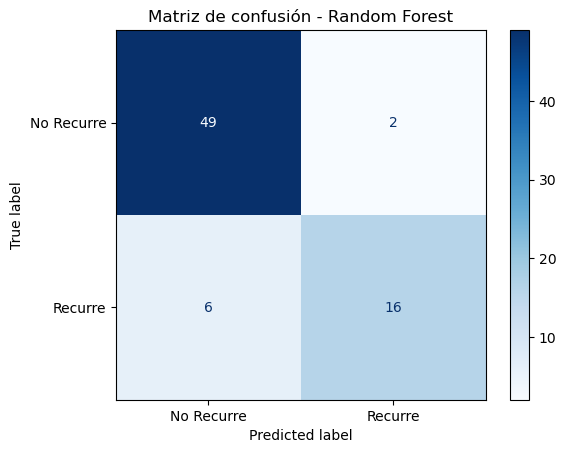

In [41]:
#Matriz de confusión
target_names = ["No Recurre", "Recurre"]

ConfusionMatrixDisplay.from_estimator(rf, x_test, y_test, display_labels=target_names, cmap='Blues')
plt.grid(False)
plt.title("Matriz de confusión - Random Forest")
plt.show()

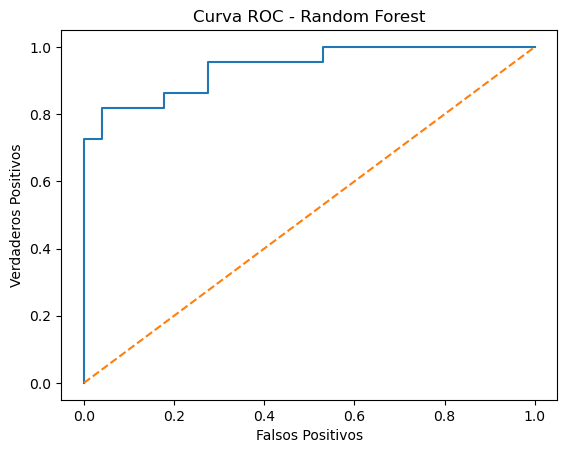

In [42]:
#Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.title("Curva ROC - Random Forest")
plt.show()

In [44]:
#Consistencia
consistencia = pd.DataFrame({'Nombre': x_train.columns, 'Importancia': rf.feature_importances_}).sort_values(by = "Importancia", ascending = False)
print(consistencia)

                                              Nombre  Importancia
18                                     Adenopathy_No     0.247195
5                                                  N     0.209826
4                                                  T     0.166087
7                                                Age     0.094494
24                                Focality_Uni-Focal     0.041983
6                                                  M     0.038801
1                                            Smoking     0.033457
20                                  Adenopathy_Right     0.030836
0                                             Gender     0.026164
9                         Thyroid Function_Euthyroid     0.015523
17                                   Adenopathy_Left     0.012681
8           Thyroid Function_Clinical Hypothyroidism     0.012299
14   Physical Examination_Single nodular goiter-left     0.009943
15  Physical Examination_Single nodular goiter-right     0.009358
22        

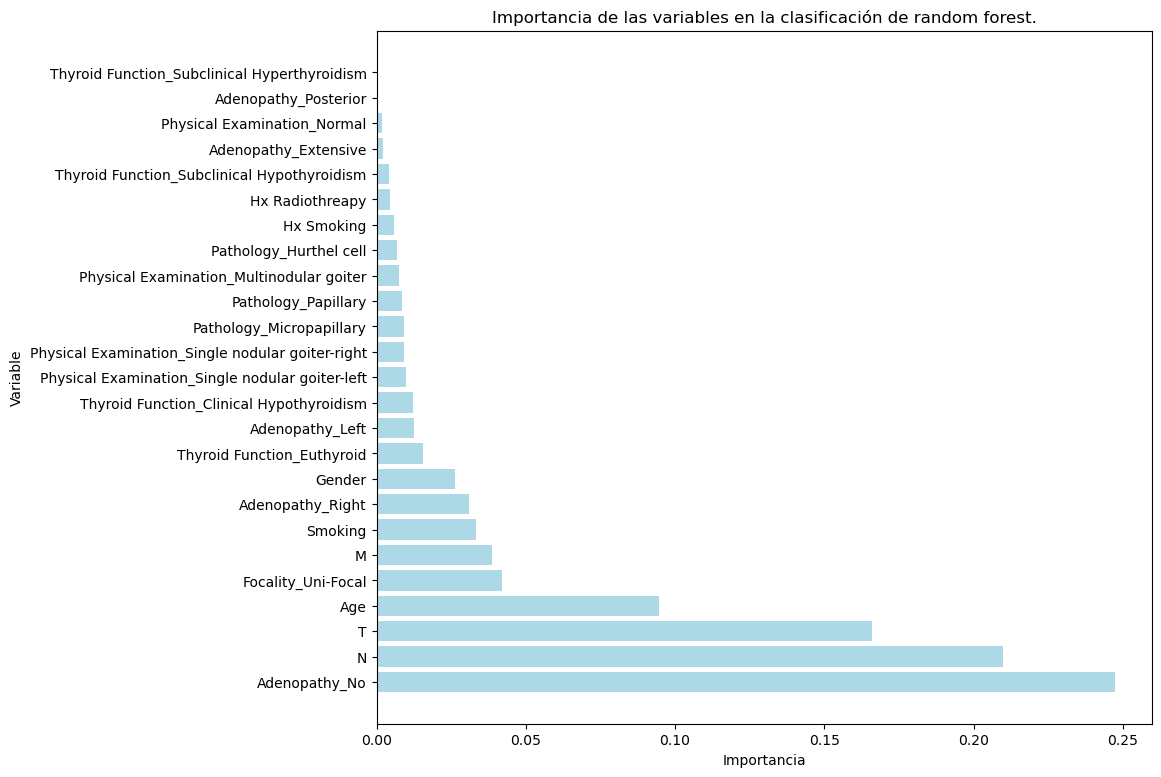

In [45]:
#Grafica de consistencia
plt.figure(figsize = (10, 9))
plt.barh(consistencia["Nombre"], consistencia["Importancia"], color = "lightblue")
plt.title("Importancia de las variables en la clasificación de random forest.")
plt.xlabel("Importancia")
plt.ylabel("Variable")

plt.show()

### SVM

In [46]:
#Creación del modelo
svm = SVC(kernel = 'rbf', probability = True, C = 1.0, random_state = 42)
svm.fit(x_train_escalado, y_train)
y_pred_svm = svm.predict(x_test_escalado)
svm

SVC(probability=True, random_state=42)

In [47]:
#Selección de c
valores_c = [0.01, 0.1, 1, 10, 100]
scores = []

for c in valores_c:
    svm_temp = SVC(kernel = "rbf", C = c, random_state = 42)
    svm_temp.fit(x_train_escalado, y_train)
    y_pred = svm_temp.predict(x_test_escalado)
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)

for c, acc in zip(valores_c, scores):
    print(f"C: {c} > Precisión: {acc:.4f}")

C: 0.01 > Precisión: 0.6986
C: 0.1 > Precisión: 0.7260
C: 1 > Precisión: 0.8904
C: 10 > Precisión: 0.8904
C: 100 > Precisión: 0.9041


In [48]:
#Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)

Accuracy: 0.8904109589041096


In [49]:
#AUC
y_pred_prob_svm = svm.predict_proba(x_test_escalado)[:,1]

auc_svm = roc_auc_score(y_test, y_pred_prob_svm)
print("AUC:", auc_svm)

AUC: 0.9313725490196079


In [50]:
#Resultados del modelo
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        51
           1       0.89      0.73      0.80        22

    accuracy                           0.89        73
   macro avg       0.89      0.84      0.86        73
weighted avg       0.89      0.89      0.89        73



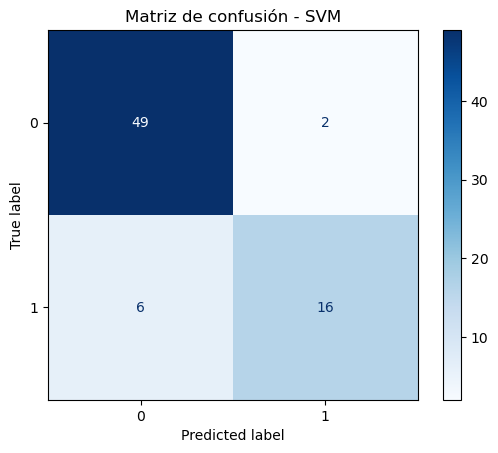

In [51]:
#Matriz de confusión
ConfusionMatrixDisplay.from_estimator(svm, x_test_escalado, y_test, cmap = "Blues")
plt.grid(False)
plt.title("Matriz de confusión - SVM")
plt.show()

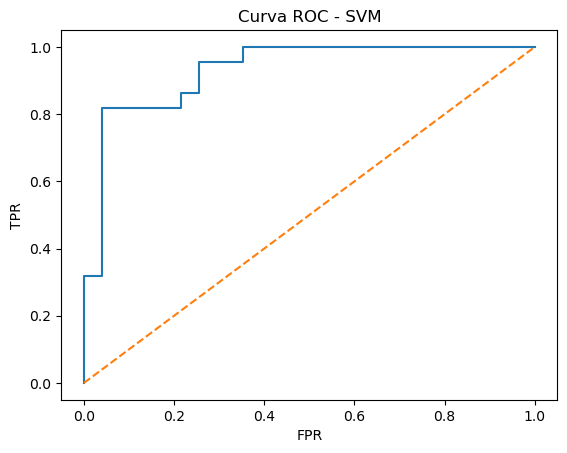

In [52]:
#Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_svm)

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], '--')
plt.title("Curva ROC - SVM")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

### Naive Bayes

In [58]:
#Creación del modelo
nb = MultinomialNB(alpha = 1.0)
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)
nb

MultinomialNB()

In [59]:
#Accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy_nb)

Accuracy: 0.863013698630137


In [60]:
#AUC
y_pred_prob_nb = nb.predict_proba(x_test)[:,1]

auc_nb = roc_auc_score(y_test, y_pred_prob_nb)
print("AUC:", auc_nb)

AUC: 0.9099821746880571


In [61]:
#Resultados del modelo
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        51
           1       0.77      0.77      0.77        22

    accuracy                           0.86        73
   macro avg       0.84      0.84      0.84        73
weighted avg       0.86      0.86      0.86        73



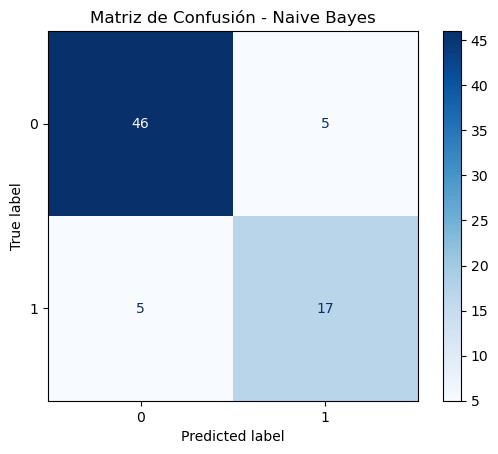

In [62]:
#Matriz de confusión
ConfusionMatrixDisplay.from_estimator(nb, x_test, y_test, cmap="Blues")

plt.title("Matriz de Confusión - Naive Bayes")
plt.grid(False)
plt.show()

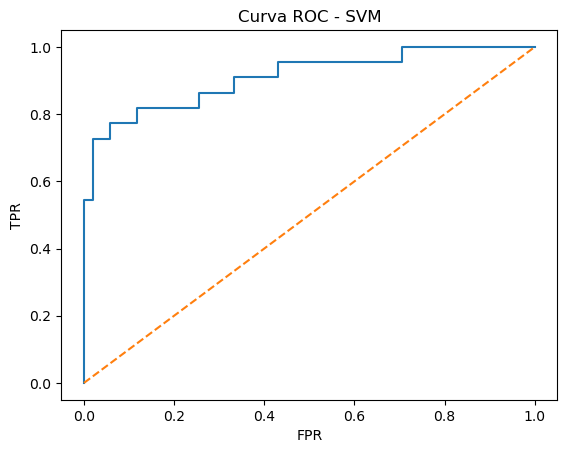

In [63]:
#Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_nb)

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], '--')
plt.title("Curva ROC - SVM")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

### Evaluación de modelos.

In [65]:
#Evaluación
models = {'LogReg': lr, 'RF': rf, 'SVM': svm, 'NB': nb}

results = []

for name, model in models.items():
    start = time.time()

    if name in ["LogReg", "SVM"]:
        x_used = x_test_escalado
    else:
        x_used = x_test
        
    y_pred = model.predict(x_used)
    y_prob = model.predict_proba(x_used)[:,1] if hasattr(model, "predict_proba") else None
    end = time.time()
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    results.append([name, acc, f1, recall, auc, end-start])


df_final_df = pd.DataFrame(results, columns=["Modelo", "Accuracy", "F1", "Recall", "AUC", "Tiempo"])
df_final_df.sort_values(by = "Accuracy", ascending = False, inplace = True)
display(df_final_df)

,Modelo,Accuracy,F1,Recall,AUC,Tiempo
0,LogReg,0.890411,0.809524,0.772727,0.948307,0.004673
1,RF,0.890411,0.800000,0.727273,0.939394,0.026820
2,SVM,0.890411,0.800000,0.727273,0.931373,0.012183
3,NB,0.863014,0.772727,0.772727,0.909982,0.005847


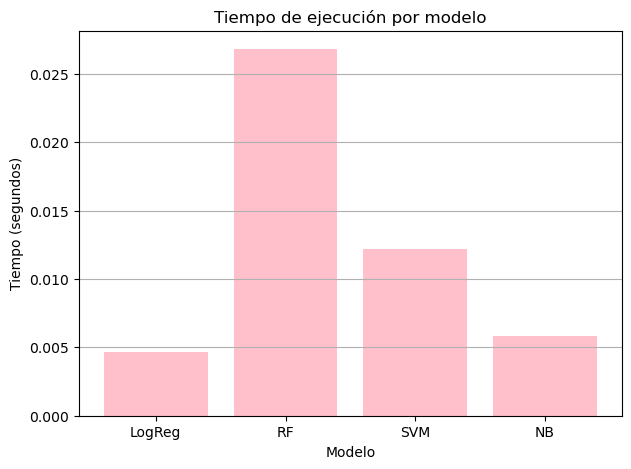

In [66]:
#Grafica de tiempo
plt.figure(figsize=(7,5))
plt.bar(df_final_df['Modelo'], df_final_df['Tiempo'], color='pink')
plt.title('Tiempo de ejecución por modelo')
plt.xlabel('Modelo')
plt.ylabel('Tiempo (segundos)')
plt.grid(True, axis='y')
plt.show()

Podemos concluir que el modelo seleccionado es: **Regresión Logistica.**